In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')

%matplotlib inline
sns.set()

In [2]:
import glob

In [3]:
no_kaf = "../logs/darnn/ntsa-2019-01-04-16-47-47-964267"
kaf_time = "../logs/darnn/ntsa-2019-01-04-16-48-10-505717"
kaf_input = "../logs/darnn/ntsa-2019-01-04-16-49-08-658271"
kaf_dual = "../logs/darnn/ntsa-2019-01-04-16-58-06-713421"

In [4]:
df_no_kaf = pd.read_csv(no_kaf + '/train/results.csv')
df_kaf_time = pd.read_csv(kaf_time + '/train/results.csv')
df_kaf_input = pd.read_csv(kaf_input + '/train/results.csv')
df_kaf_dual = pd.read_csv(kaf_dual + '/train/results.csv')

In [5]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

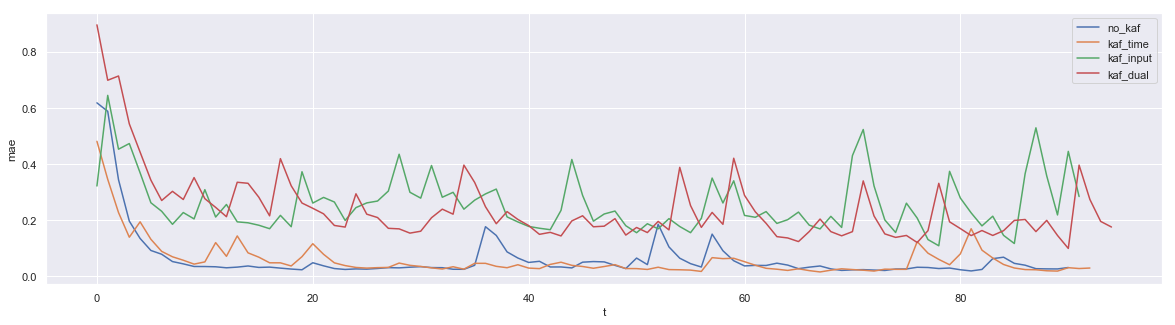

In [6]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

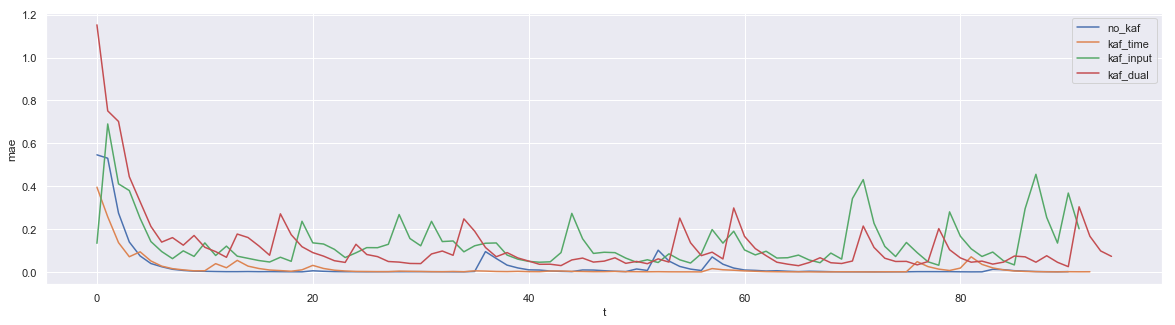

In [7]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [8]:

rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.056449,5.051286,0.020695,0.056449,0.094448,0.056449,24.611146
kaf_time,0.053813,5.342352,0.014373,0.053813,0.097628,0.053813,25.166151
kaf_input,0.258571,4.823941,0.137134,0.258571,0.400609,0.258571,136.416310
kaf_dual,0.233036,4.245161,0.112286,0.233036,0.364934,0.233036,116.824874


In [9]:
header = table.index.tolist()

In [10]:
df_no_kaf = pd.read_csv(no_kaf + '/test/results.csv', names=header)
df_kaf_time = pd.read_csv(kaf_time + '/test/results.csv', names=header)
df_kaf_input = pd.read_csv(kaf_input + '/test/results.csv', names=header)
df_kaf_dual = pd.read_csv(kaf_dual+ '/test/results.csv', names=header)

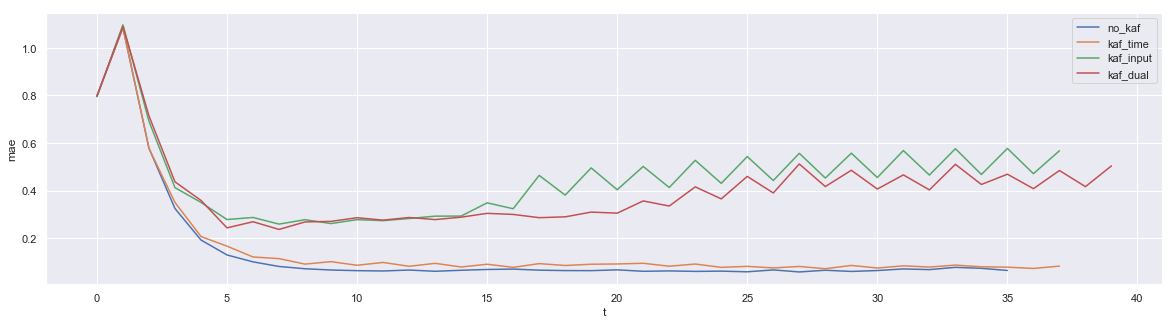

In [11]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [12]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [13]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.121710,6.774330,0.086238,0.121710,0.162981,0.121710,29.391630
kaf_time,0.137979,5.852846,0.086367,0.137979,0.170439,0.137979,29.848676
kaf_input,0.444504,7.360591,0.297594,0.444504,0.478772,0.444504,156.313581
kaf_dual,0.395839,7.361134,0.242402,0.395839,0.452452,0.395839,154.151706


In [14]:
def last_path(base_path):
    paths = glob.glob(base_path + '/report/*.csv')
    idxs = list(map(lambda x: int(x.split('/')[-1].split('_')[0]), paths))
    idx = max(idxs)
    paths
    return base_path + '/report/' + ''.join([str(idx), '_', 'report.csv'])

In [15]:
df_no_kaf = pd.read_csv(last_path(no_kaf), index_col=0)
df_kaf_time = pd.read_csv(last_path(kaf_time), index_col=0)
df_kaf_input = pd.read_csv(last_path(kaf_input), index_col=0)
df_kaf_dual = pd.read_csv(last_path(kaf_dual), index_col=0)

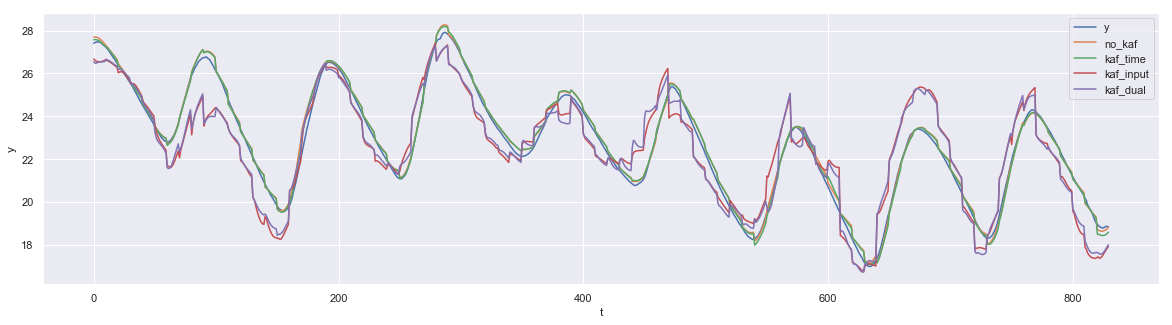

In [16]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['y','no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [17]:
from ntsa.utils.misc import regr_metrics

In [18]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [19]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [20]:
pd.DataFrame(np.array(metrics), index=['no_kaf', 'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,0.048897,0.173869,0.007756,0.773418
time,0.046343,0.171474,0.007706,0.770000
input,1.254169,0.939413,0.042109,4.243008
dual,1.161737,0.895159,0.040040,4.030327
